### **Import the library**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people

### **Load the dataset**

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100)
print("Class names", faces.target_names)
print("Shape", faces.images.shape)

Class names ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
Shape (1140, 62, 47)


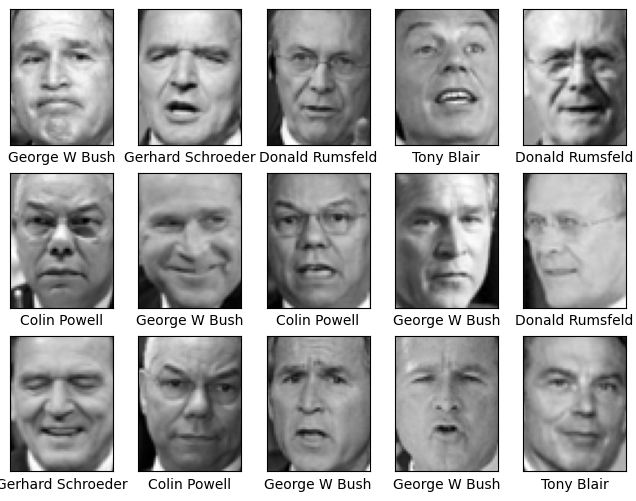

In [3]:
# Let's plot a few of these faces to see what we're working with

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

plt.show()

In [4]:
# classes

data = np.array(faces.target)
print(data)

[2 3 1 ... 4 2 4]


In [5]:
# class distribution
unique, counts = np.unique(data, return_counts = True)
print(np.asarray((unique, counts)).T)

[[  0 236]
 [  1 121]
 [  2 530]
 [  3 109]
 [  4 144]]


In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.2, random_state = 42)

In [8]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

CPU times: user 36.3 s, sys: 27.1 s, total: 1min 3s
Wall time: 39.5 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [9]:
model = grid.best_estimator_
pred = model.predict(x_test)

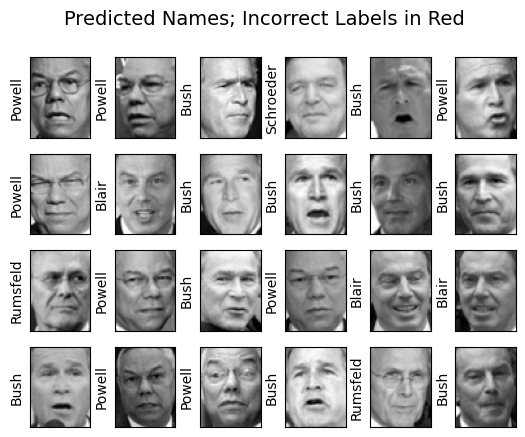

In [10]:
fig, ax = plt.subplots(4, 6)
for i, ax in enumerate(ax.flat):
    ax.imshow(x_test[i].reshape(62, 47), cmap='gray')
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel(faces.target_names[pred[i]].split()[-1],
                   color='black' if pred[i] == pred[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.92      0.91        50
  Donald Rumsfeld       1.00      0.88      0.94        25
    George W Bush       0.91      0.97      0.94       106
Gerhard Schroeder       1.00      0.86      0.93        22
       Tony Blair       0.87      0.80      0.83        25

         accuracy                           0.92       228
        macro avg       0.94      0.89      0.91       228
     weighted avg       0.92      0.92      0.92       228



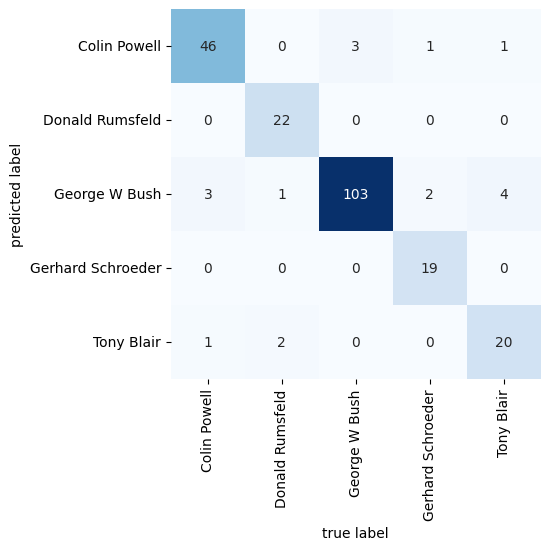

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()